In [1]:
import glob
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

matplotlib.style.use('ggplot')
%matplotlib inline

# Human Activity Recognition Using Smartphones Data Set 

Data: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

### Description

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute Information:

For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment. 

In [2]:
cols = pd.read_table('./UCI HAR Dataset/features.txt', sep=' ', header=None)
HAR_Y_train = pd.read_table('./UCI HAR Dataset/train/Y_train.txt', sep=' ', header=None, skipinitialspace=True)
HAR_X_train = pd.read_table('./UCI HAR Dataset/train/X_train.txt', sep=' ', header=None, skipinitialspace=True)
HAR_X_train.columns = cols.loc[:,1]
HAR_Y_train = HAR_Y_train.values.reshape(HAR_Y_train.shape[0],)

HAR_Y_test = pd.read_table('./UCI HAR Dataset/test/Y_test.txt', sep=' ', header=None, skipinitialspace=True)
HAR_X_test = pd.read_table('./UCI HAR Dataset/test/X_test.txt', sep=' ', header=None, skipinitialspace=True)
HAR_X_test.columns = cols.loc[:,1]
HAR_Y_test = HAR_Y_test.values.reshape(HAR_Y_test.shape[0],)

HAR_X_train, HAR_Y_train = shuffle(HAR_X_train, HAR_Y_train, random_state=0)

In [3]:
HAR_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

In [4]:
def plot_confusion_matrix(cm, title, target_names, cmap=plt.cm.coolwarm):
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Random Forest

In [5]:
HAR_rf = RandomForestClassifier()
HAR_rf_model = HAR_rf.fit(HAR_X_train, HAR_Y_train)
HAR_rf_pred = HAR_rf_model.predict(HAR_X_test)
print(classification_report(HAR_Y_test, HAR_rf_pred))

             precision    recall  f1-score   support

          1       0.85      0.97      0.91       496
          2       0.89      0.85      0.87       471
          3       0.95      0.83      0.89       420
          4       0.89      0.88      0.88       491
          5       0.89      0.89      0.89       532
          6       1.00      1.00      1.00       537

avg / total       0.91      0.91      0.91      2947



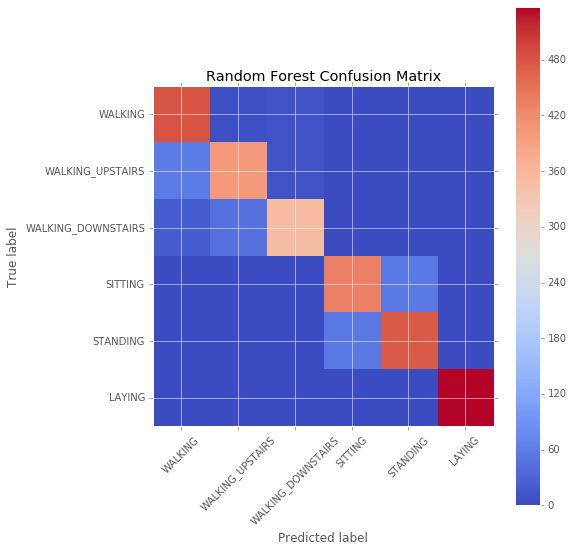

In [6]:
HAR_rf_cm = confusion_matrix(HAR_Y_test, HAR_rf_pred)
plot_confusion_matrix(HAR_rf_cm, "Random Forest Confusion Matrix", HAR_labels)

### Logistic Regression

In [7]:
HAR_lg = LogisticRegression()
HAR_lg_model = HAR_lg.fit(HAR_X_train, HAR_Y_train)
HAR_lg_pred = HAR_lg_model.predict(HAR_X_test)
print(classification_report(HAR_Y_test, HAR_lg_pred))

             precision    recall  f1-score   support

          1       0.94      1.00      0.97       496
          2       0.97      0.95      0.96       471
          3       1.00      0.97      0.98       420
          4       0.97      0.88      0.92       491
          5       0.90      0.97      0.94       532
          6       1.00      1.00      1.00       537

avg / total       0.96      0.96      0.96      2947



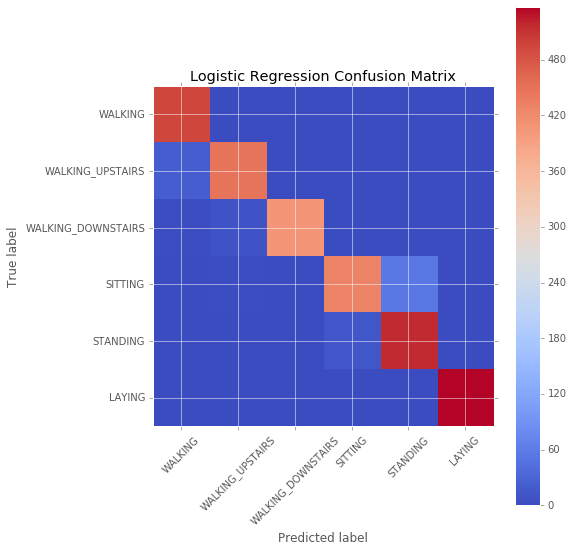

In [8]:
HAR_lg_cm = confusion_matrix(HAR_Y_test, HAR_lg_pred)
plot_confusion_matrix(HAR_lg_cm, "Logistic Regression Confusion Matrix", HAR_labels)

### SGD

In [9]:
HAR_sgd = SGDClassifier()
HAR_sgd_model = HAR_sgd.fit(HAR_X_train, HAR_Y_train)
HAR_sgd_pred = HAR_sgd_model.predict(HAR_X_test)
print(classification_report(HAR_Y_test, HAR_sgd_pred))

             precision    recall  f1-score   support

          1       0.75      1.00      0.85       496
          2       1.00      0.51      0.68       471
          3       0.91      0.97      0.94       420
          4       0.98      0.68      0.80       491
          5       0.71      0.99      0.83       532
          6       1.00      0.97      0.98       537

avg / total       0.89      0.86      0.85      2947



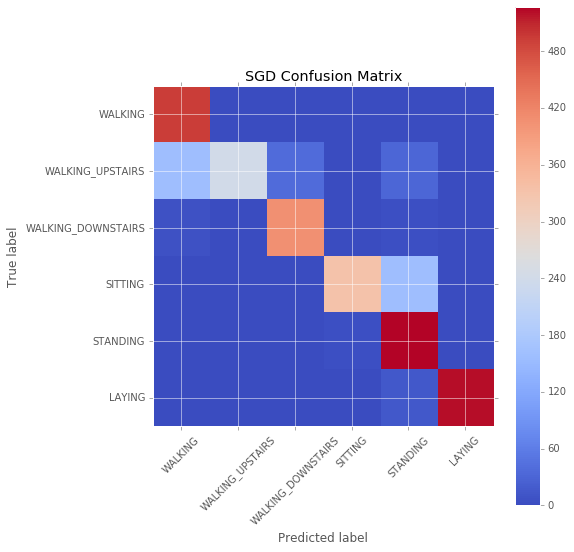

In [10]:
HAR_sgd_cm = confusion_matrix(HAR_Y_test, HAR_sgd_pred)
plot_confusion_matrix(HAR_sgd_cm, "SGD Confusion Matrix", HAR_labels)

### Naive Bayes

In [11]:
HAR_nb = BernoulliNB()
HAR_nb_model = HAR_nb.fit(HAR_X_train, HAR_Y_train)
HAR_nb_pred = HAR_nb_model.predict(HAR_X_test)
print(classification_report(HAR_Y_test, HAR_nb_pred))

             precision    recall  f1-score   support

          1       0.75      0.91      0.82       496
          2       0.83      0.89      0.86       471
          3       0.85      0.59      0.70       420
          4       0.88      0.75      0.81       491
          5       0.80      0.90      0.85       532
          6       1.00      1.00      1.00       537

avg / total       0.86      0.85      0.85      2947



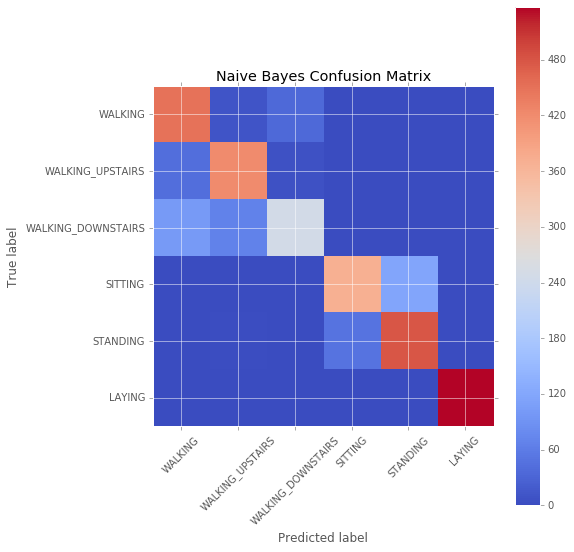

In [12]:
HAR_nb_cm = confusion_matrix(HAR_Y_test, HAR_nb_pred)
plot_confusion_matrix(HAR_nb_cm, "Naive Bayes Confusion Matrix", HAR_labels)

### KNN

In [13]:
HAR_knn = KNeighborsClassifier(n_neighbors=5)
HAR_knn_model = HAR_knn.fit(HAR_X_train, HAR_Y_train)
HAR_knn_pred = HAR_knn_model.predict(HAR_X_test)
print(classification_report(HAR_Y_test, HAR_knn_pred))

             precision    recall  f1-score   support

          1       0.85      0.98      0.91       496
          2       0.89      0.90      0.90       471
          3       0.95      0.79      0.86       420
          4       0.91      0.79      0.85       491
          5       0.83      0.93      0.88       532
          6       1.00      0.99      1.00       537

avg / total       0.91      0.90      0.90      2947



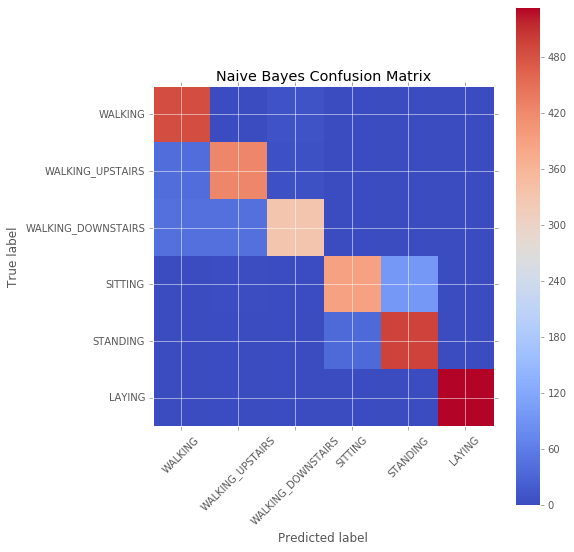

In [14]:
HAR_knn_cm = confusion_matrix(HAR_Y_test, HAR_knn_pred)
plot_confusion_matrix(HAR_knn_cm, "Naive Bayes Confusion Matrix", HAR_labels)

### PCA

In [15]:
HAR_pca = PCA(n_components=2)
HAR_pca_fit = HAR_pca.fit_transform(HAR_X_train)

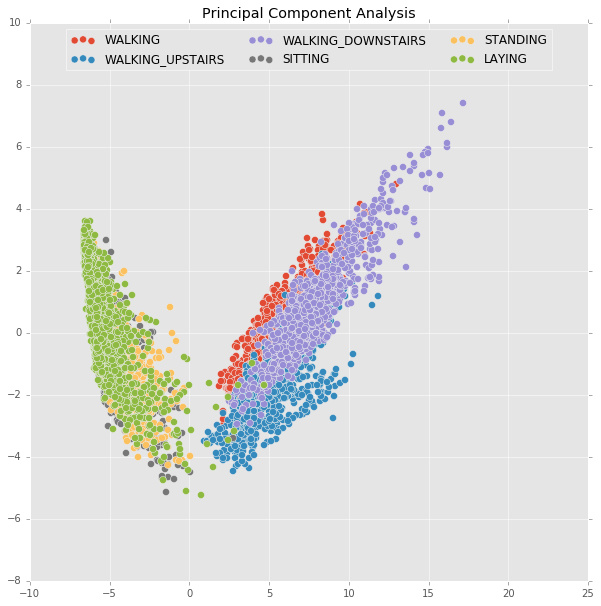

In [16]:
HAR_colors = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

plt.figure(figsize=(10,10))
for l in range(1,7):
    ind = HAR_Y_train == l
    plt.scatter(x=HAR_pca_fit[ind, 0], 
                y=HAR_pca_fit[ind, 1], 
                c=HAR_colors[l-1], 
                label=HAR_labels[l-1],
                s=50, 
                alpha=1)
plt.legend(loc=9, ncol=3)
plt.title('Principal Component Analysis')
plt.show()

### TSNE

In [17]:
HAR_tsne = TSNE(n_components=2, n_iter=200, learning_rate=1000, verbose=1)
HAR_tsne_fit = HAR_tsne.fit_transform(HAR_X_train.iloc[:1000,:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.620617
[t-SNE] Error after 100 iterations with early exaggeration: 0.978702
[t-SNE] Error after 175 iterations: 0.899644


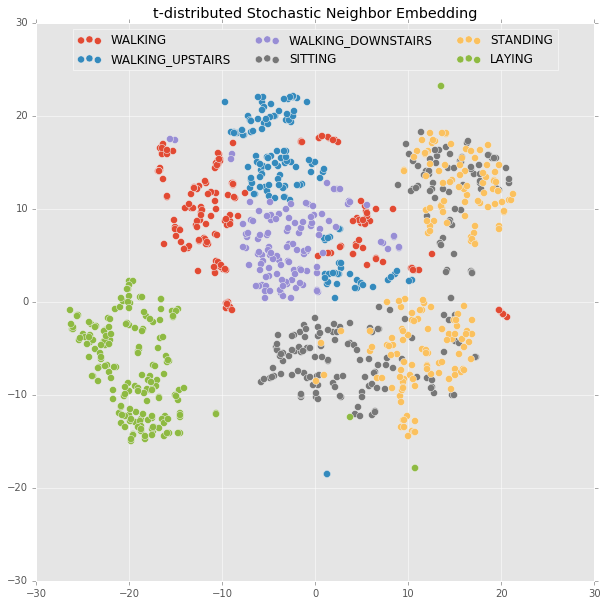

In [18]:
plt.figure(figsize=(10,10))
for l in range(1,7):
    ind = (HAR_Y_train == l)[:1000]
    plt.scatter(x=HAR_tsne_fit[ind, 0], 
                y=HAR_tsne_fit[ind, 1], 
                c=HAR_colors[l-1], 
                label=HAR_labels[l-1],
                s=50,
                alpha=1)
plt.legend(loc=9, ncol=3)
plt.title('t-distributed Stochastic Neighbor Embedding')
plt.show()

# Dataset for ADL Recognition with Wrist-worn Accelerometer Data Set 

Data: https://archive.ics.uci.edu/ml/datasets/Dataset+for+ADL+Recognition+with+Wrist-worn+Accelerometer

### Description
The Dataset for ADL Recognition with Wrist-worn Accelerometer is a public collection of labelled accelerometer data recordings to be used for the creation and validation of acceleration models of simple ADL.

The Dataset is composed of the recordings of 14 simple ADL (brush_teeth, climb_stairs, comb_hair, descend_stairs, drink_glass, eat_meat, eat_soup, getup_bed, liedown_bed, pour_water, sitdown_chair, standup_chair, use_telephone, walk) perfomed by a total of 16 volunteers.

The data are collected by a single tri-axial accelerometer attached to the right-wrist of the volunteer. 

Each record of a file reports:
- acceleration along the x axis of the accelerometer
- acceleration along the y axis of the accelerometer
- acceleration along the z axis of the accelerometer

In [19]:
root = './HMP_Dataset/'
wrist_class = {'Brush_teeth':0, 
              'Use_telephone':1, 
              'Drink_glass':2, 
              'Comb_hair':3, 
              'Walk':4,
              'Standup_chair':5,
              'Sitdown_chair':6,
              'Pour_water':7,
              'Getup_bed':8,
              'Liedown_bed':9,
              'Eat_meat':10,
              'Descend_stairs':11
             }

wrist_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

wrist_labels = sorted(wrist_class, key=wrist_class.get, reverse=False)

def gather(class_dict):
    df = []
    for c in class_dict.keys():
        f = glob.glob(root + c + '/*')
        d = pd.DataFrame(reformat(f, cls=c))
        df.append(d)
    return pd.concat(df)

def reformat(files, cls):
    big_list = []
    for f in files:
        data = pd.read_table(f, sep=' ', header=None, names=['x', 'y', 'z'])
        features = pd.concat([data.mean(axis=0).rename(index=lambda x: 'mean' + '_' + x), 
                              data.std(axis=0).rename(index=lambda x: 'std' + '_' + x), 
                              data.max(axis=0).rename(index=lambda x: 'max' + '_' + x), 
                              data.min(axis=0).rename(index=lambda x: 'min' + '_' + x)])
        features['Y'] = wrist_class[cls]
        big_list.append(features)
    return big_list

In [20]:
wrist_df = gather(wrist_class)
wrist_Y = wrist_df.Y
wrist_X = wrist_df.iloc[:,:12]

In [21]:
wrist_X, wrist_Y = shuffle(wrist_X, wrist_Y, random_state=0)
n_samples = 200

wrist_X_train = wrist_X[n_samples:]
wrist_Y_train = wrist_Y[n_samples:]
wrist_X_test = wrist_X[:n_samples]
wrist_Y_test = wrist_Y[:n_samples]

### Logistic Regression

In [22]:
wrist_lg = LogisticRegression()
wrist_lg_model = wrist_lg.fit(wrist_X_train, wrist_Y_train)
wrist_lg_pred = wrist_lg_model.predict(wrist_X_test)
print(classification_report(wrist_Y_test, wrist_lg_pred, target_names=wrist_labels))

                precision    recall  f1-score   support

   Brush_teeth       1.00      1.00      1.00         1
 Use_telephone       0.00      0.00      0.00         3
   Drink_glass       0.75      0.89      0.81        27
     Comb_hair       1.00      1.00      1.00         7
          Walk       0.88      0.90      0.89        31
 Standup_chair       0.78      0.62      0.69        29
 Sitdown_chair       0.53      0.76      0.63        21
    Pour_water       0.79      0.69      0.73        32
     Getup_bed       0.56      0.79      0.66        24
   Liedown_bed       0.00      0.00      0.00        13
      Eat_meat       0.00      0.00      0.00         2
Descend_stairs       0.75      0.90      0.82        10

   avg / total       0.68      0.72      0.69       200



/Users/jsemer/.virtualenvs/activity-prediction/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


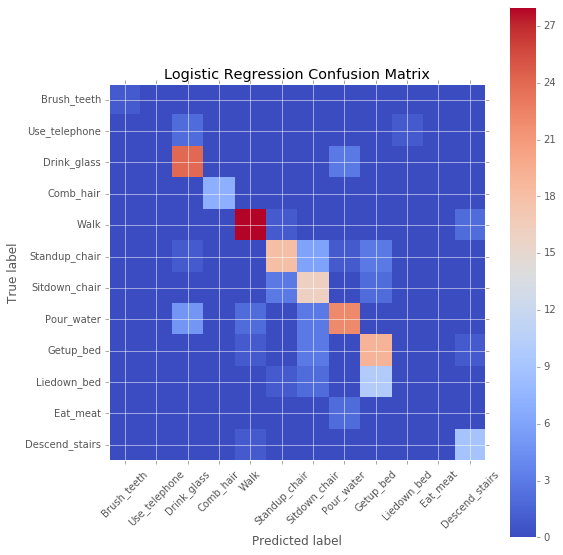

In [23]:
wrist_lg_cm = confusion_matrix(wrist_Y_test, wrist_lg_pred)
plot_confusion_matrix(wrist_lg_cm, "Logistic Regression Confusion Matrix", wrist_labels)

### Random Forest

In [24]:
wrist_rf = RandomForestClassifier()
wrist_rf_model = wrist_rf.fit(wrist_X_train, wrist_Y_train)
wrist_rf_pred = wrist_rf_model.predict(wrist_X_test)
print(classification_report(wrist_Y_test, wrist_rf_pred, target_names=wrist_labels))

                precision    recall  f1-score   support

   Brush_teeth       1.00      1.00      1.00         1
 Use_telephone       1.00      0.67      0.80         3
   Drink_glass       0.73      0.89      0.80        27
     Comb_hair       1.00      1.00      1.00         7
          Walk       0.87      0.84      0.85        31
 Standup_chair       0.80      0.69      0.74        29
 Sitdown_chair       0.74      0.67      0.70        21
    Pour_water       0.81      0.78      0.79        32
     Getup_bed       0.53      0.88      0.66        24
   Liedown_bed       0.00      0.00      0.00        13
      Eat_meat       0.00      0.00      0.00         2
Descend_stairs       0.58      0.70      0.64        10

   avg / total       0.70      0.73      0.71       200



/Users/jsemer/.virtualenvs/activity-prediction/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


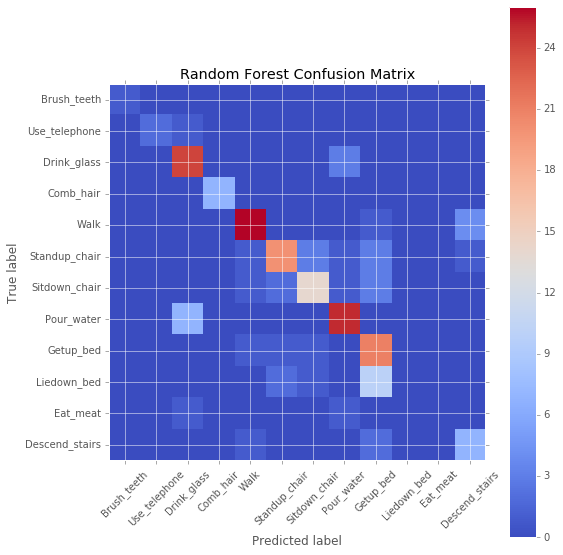

In [25]:
wrist_rf_cm = confusion_matrix(wrist_Y_test, wrist_rf_pred)
plot_confusion_matrix(wrist_rf_cm, "Random Forest Confusion Matrix", wrist_labels)

### SGD

In [26]:
wrist_sgd = SGDClassifier()
wrist_sgd_model = wrist_sgd.fit(wrist_X_train, wrist_Y_train)
wrist_sgd_pred = wrist_sgd_model.predict(wrist_X_test)
print(classification_report(wrist_Y_test, wrist_sgd_pred, target_names=wrist_labels))

                precision    recall  f1-score   support

   Brush_teeth       0.25      1.00      0.40         1
 Use_telephone       0.00      0.00      0.00         3
   Drink_glass       0.40      0.07      0.12        27
     Comb_hair       0.70      1.00      0.82         7
          Walk       0.93      0.42      0.58        31
 Standup_chair       0.00      0.00      0.00        29
 Sitdown_chair       0.33      0.52      0.41        21
    Pour_water       0.32      0.97      0.48        32
     Getup_bed       0.65      0.46      0.54        24
   Liedown_bed       0.00      0.00      0.00        13
      Eat_meat       0.00      0.00      0.00         2
Descend_stairs       0.35      0.70      0.47        10

   avg / total       0.40      0.41      0.34       200



/Users/jsemer/.virtualenvs/activity-prediction/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


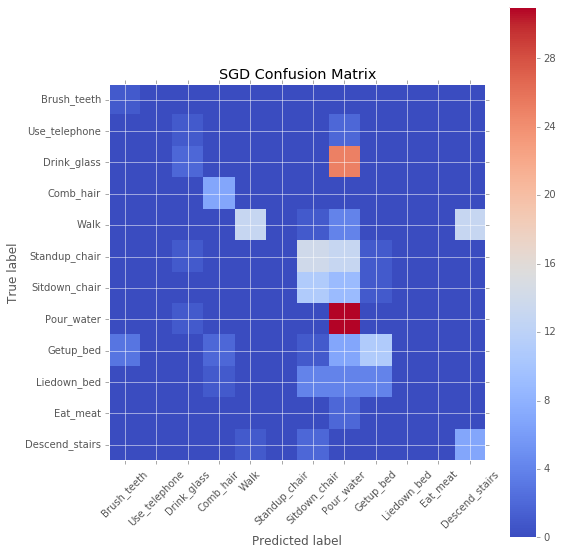

In [27]:
wrist_sgd_cm = confusion_matrix(wrist_Y_test, wrist_sgd_pred)
plot_confusion_matrix(wrist_sgd_cm, "SGD Confusion Matrix", wrist_labels)

### KNN

In [28]:
wrist_knn = KNeighborsClassifier(n_neighbors=5)
wrist_knn_model = wrist_knn.fit(wrist_X_train, wrist_Y_train)
wrist_knn_pred = wrist_knn_model.predict(wrist_X_test)
print(classification_report(wrist_Y_test, wrist_knn_pred, target_names=wrist_labels))

                precision    recall  f1-score   support

   Brush_teeth       1.00      1.00      1.00         1
 Use_telephone       1.00      0.67      0.80         3
   Drink_glass       0.59      0.74      0.66        27
     Comb_hair       0.78      1.00      0.88         7
          Walk       0.93      0.84      0.88        31
 Standup_chair       0.71      0.83      0.76        29
 Sitdown_chair       0.61      0.52      0.56        21
    Pour_water       0.67      0.56      0.61        32
     Getup_bed       0.57      0.83      0.68        24
   Liedown_bed       0.00      0.00      0.00        13
      Eat_meat       0.00      0.00      0.00         2
Descend_stairs       0.58      0.70      0.64        10

   avg / total       0.64      0.68      0.65       200



/Users/jsemer/.virtualenvs/activity-prediction/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


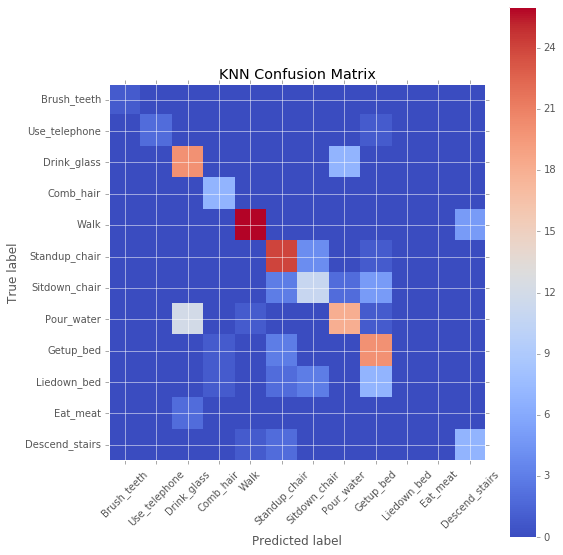

In [29]:
wrist_knn_cm = confusion_matrix(wrist_Y_test, wrist_knn_model.predict(wrist_X_test))
plot_confusion_matrix(wrist_knn_cm, "KNN Confusion Matrix", wrist_labels)

### Naive Bayes

In [30]:
wrist_nb = BernoulliNB()
wrist_nb_model = wrist_nb.fit(wrist_X_train, wrist_Y_train)
wrist_nb_pred = wrist_nb_model.predict(wrist_X_test)
print(classification_report(wrist_Y_test, wrist_nb_pred, target_names=wrist_labels))

                precision    recall  f1-score   support

   Brush_teeth       0.00      0.00      0.00         1
 Use_telephone       0.00      0.00      0.00         3
   Drink_glass       0.00      0.00      0.00        27
     Comb_hair       0.88      1.00      0.93         7
          Walk       0.53      0.74      0.62        31
 Standup_chair       0.00      0.00      0.00        29
 Sitdown_chair       0.13      0.95      0.24        21
    Pour_water       0.00      0.00      0.00        32
     Getup_bed       0.00      0.00      0.00        24
   Liedown_bed       0.00      0.00      0.00        13
      Eat_meat       0.00      0.00      0.00         2
Descend_stairs       0.00      0.00      0.00        10

   avg / total       0.13      0.25      0.15       200



/Users/jsemer/.virtualenvs/activity-prediction/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


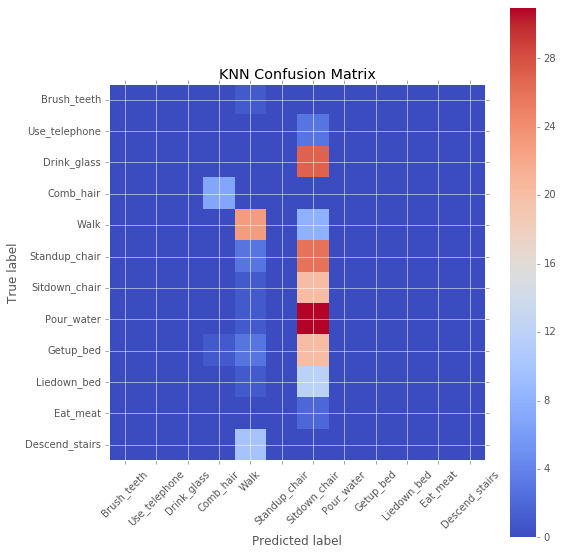

In [31]:
wrist_nb_cm = confusion_matrix(wrist_Y_test, wrist_nb_model.predict(wrist_X_test))
plot_confusion_matrix(wrist_nb_cm, "KNN Confusion Matrix", wrist_labels)

### PCA

In [32]:
wrist_pca = PCA(n_components=2)
wrist_pca_fit = wrist_pca.fit_transform(wrist_X)

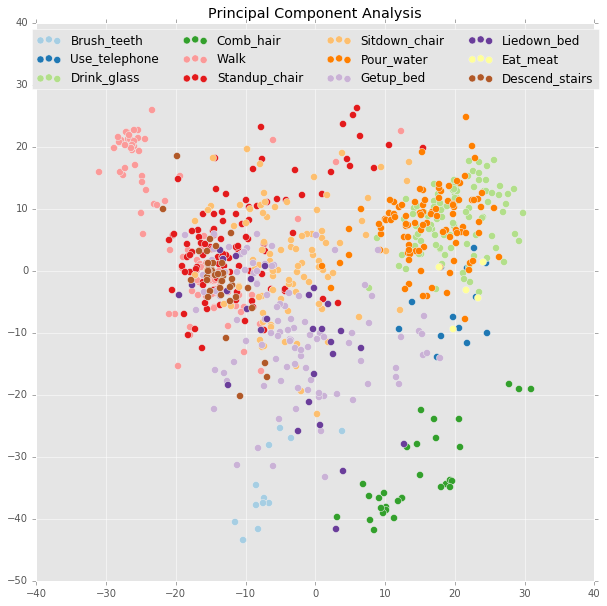

In [33]:
plt.figure(figsize=(10,10))
for l, _ in enumerate(wrist_labels):
    ind = wrist_Y.values == l
    plt.scatter(x=wrist_pca_fit[ind, 0], 
                y=wrist_pca_fit[ind, 1], 
                c=wrist_colors[l], 
                label=wrist_labels[l],
                s=50, 
                alpha=1)
plt.legend(loc=9, ncol=4)
plt.title('Principal Component Analysis')
plt.show()

### TSNE

In [34]:
wrist_tsne = TSNE(n_components=2, n_iter=200, learning_rate=1000, verbose=1)
wrist_tsne_fit = wrist_tsne.fit_transform(wrist_X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 734 / 734
[t-SNE] Mean sigma: 5.555281
[t-SNE] Error after 100 iterations with early exaggeration: 0.818239
[t-SNE] Error after 175 iterations: 0.760860


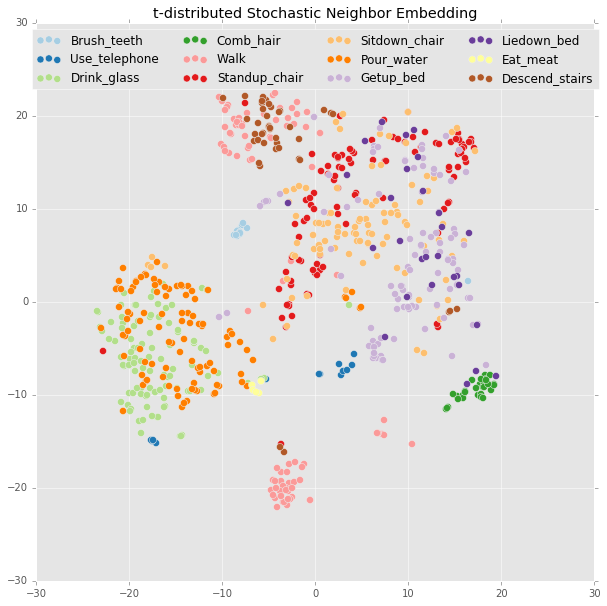

In [35]:
plt.figure(figsize=(10,10))
for l, _ in enumerate(wrist_labels):
    ind = wrist_Y.values == l
    plt.scatter(x=wrist_tsne_fit[ind, 0], 
                y=wrist_tsne_fit[ind, 1], 
                c=wrist_colors[l], 
                label=wrist_labels[l],
                s=50,
                alpha=1)
plt.ylim([-30,30])
plt.xlim([-30,30])
plt.legend(loc=9, ncol=4)
plt.title('t-distributed Stochastic Neighbor Embedding')
plt.show()